In [3]:
!wget http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d dlib_face_recognition_resnet_model_v1.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2019-06-10 04:34:33--  http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21428389 (20M)
Saving to: ‘dlib_face_recognition_resnet_model_v1.dat.bz2’

dlib_face_recogniti 100%[===================>]  20.44M  7.12MB/s    in 2.9s    

2019-06-10 04:34:37 (7.12 MB/s) - ‘dlib_face_recognition_resnet_model_v1.dat.bz2’ saved [21428389/21428389]

--2019-06-10 04:34:38--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  16.1MB/s    in 4.6s    

2019-06-10 04:34:43 (13.3 MB/s) - ‘shape_predictor_68_face_landma

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import dlib
import matplotlib.patches as mpatches
from skimage import io,draw,transform,color
import numpy as np
import pandas as pd
from scipy.spatial import distance

## 使用dlib.get_frontal_face_detector识别人脸
detector = dlib.get_frontal_face_detector()
## 定义找到人脸特征点的方法
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
## 定义提前训练好的人脸分类器,用于提取人脸的128个特征
facerec = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")

In [4]:
!ls

dlib_face_recognition_resnet_model_v1.dat
sample_data
shape_predictor_68_face_landmarks.dat


找到第一张照片的128个表示特征

(128,)


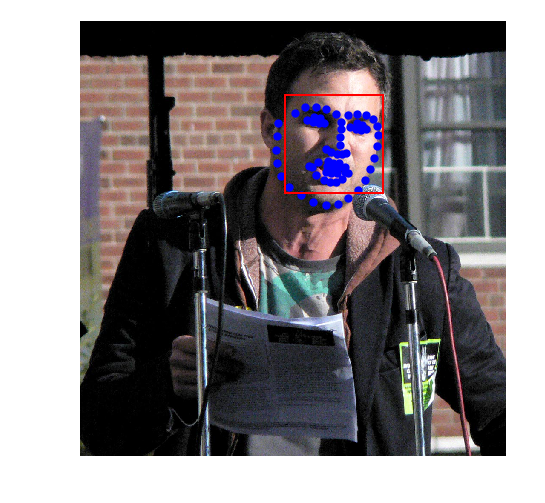

In [7]:
## 读取生成身份证图像数据
IDimage = io.imread("3a.jpg")
## 生成身份证图像的特征
dets = detector(IDimage, 2)
## 将识别的图像可视化
plt.figure()
ax = plt.subplot(111)
ax.imshow(IDimage)
plt.axis("off")
## 人脸框
left = dets[0].left()
top = dets[0].top()
right = dets[0].right()
bottom = dets[0].bottom()
rect = mpatches.Rectangle((left,bottom), right - left, top - bottom,
                              fill=False, edgecolor='red', linewidth=1)
ax.add_patch(rect)
## 从检测到的人脸中识别特征点
shape = predictor(IDimage, dets[0])
detected_landmarks = shape.parts()  
landmarks = np.array([[p.x, p.y] for p in detected_landmarks])
ax.scatter(landmarks[:,0],landmarks[:,1],c="b",s = 10)
## 生成用于分类的128个特征
cla = facerec.compute_face_descriptor(IDimage,shape)
IDfeature = np.array(cla)
print(IDfeature.shape)
plt.show()

找到用来对比的测试图像的特征点数据

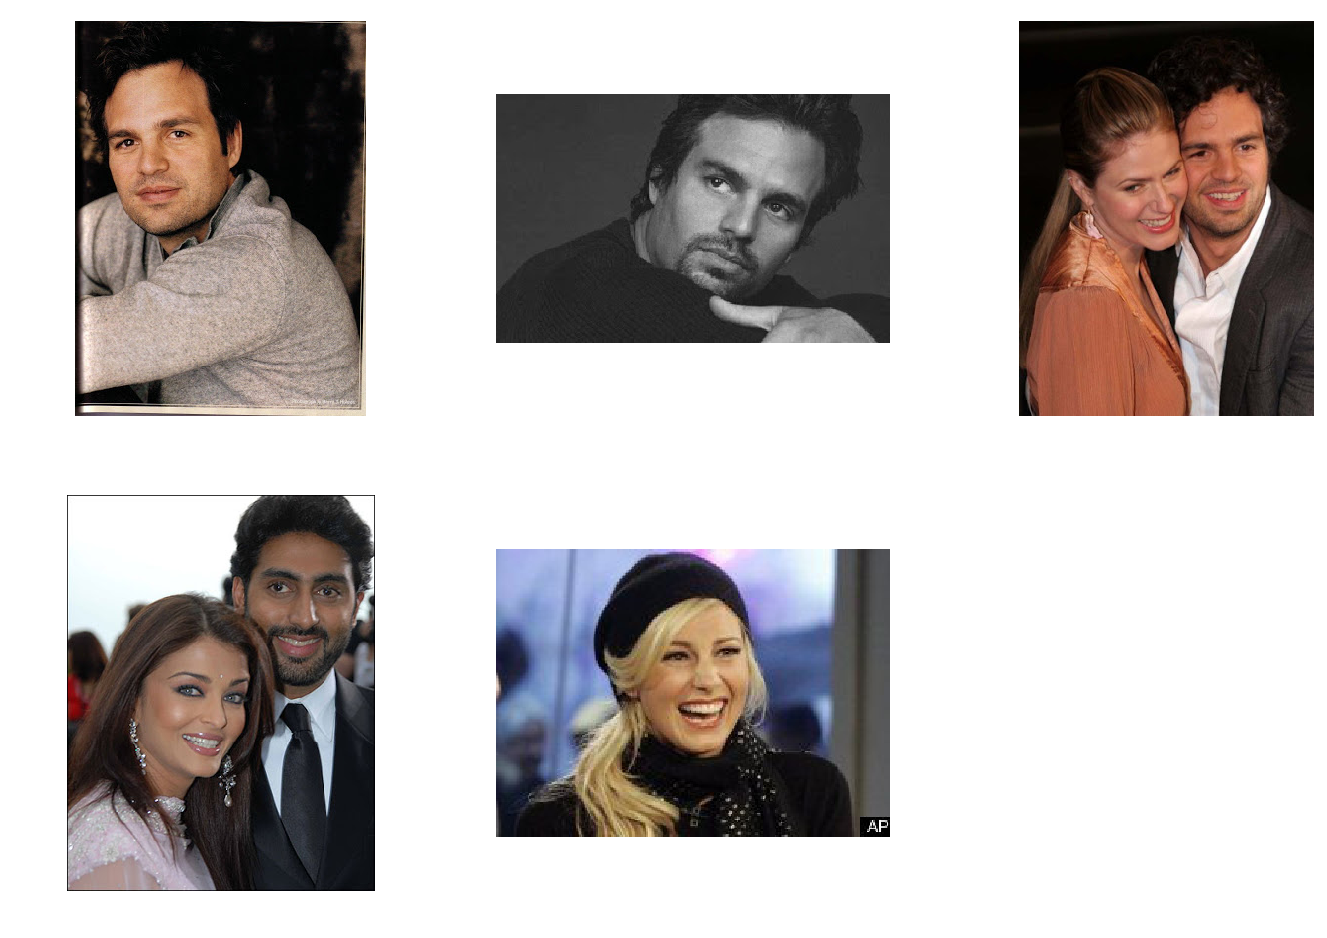

In [16]:
## 读取相互对比的图像
imob1 = io.imread("3b.jpg")
imob2 = io.imread("3c.jpg")
imob3 = io.imread("3de.jpg")
imtrup = io.imread("1.jpg")
impujing = io.imread("2.jpg")
## 将对比图像可视化
image_test = [imob1,imob2,imob3,imtrup,impujing]
plt.figure(figsize=(12,8))
for ii,im in enumerate(image_test):
    plt.subplot(2,3,ii+1)
    plt.imshow(im)
    plt.axis("off")

接下来找到照片中的人脸，68个特征点和用于比较的128个特征。

0
1
2
2
3
3
4


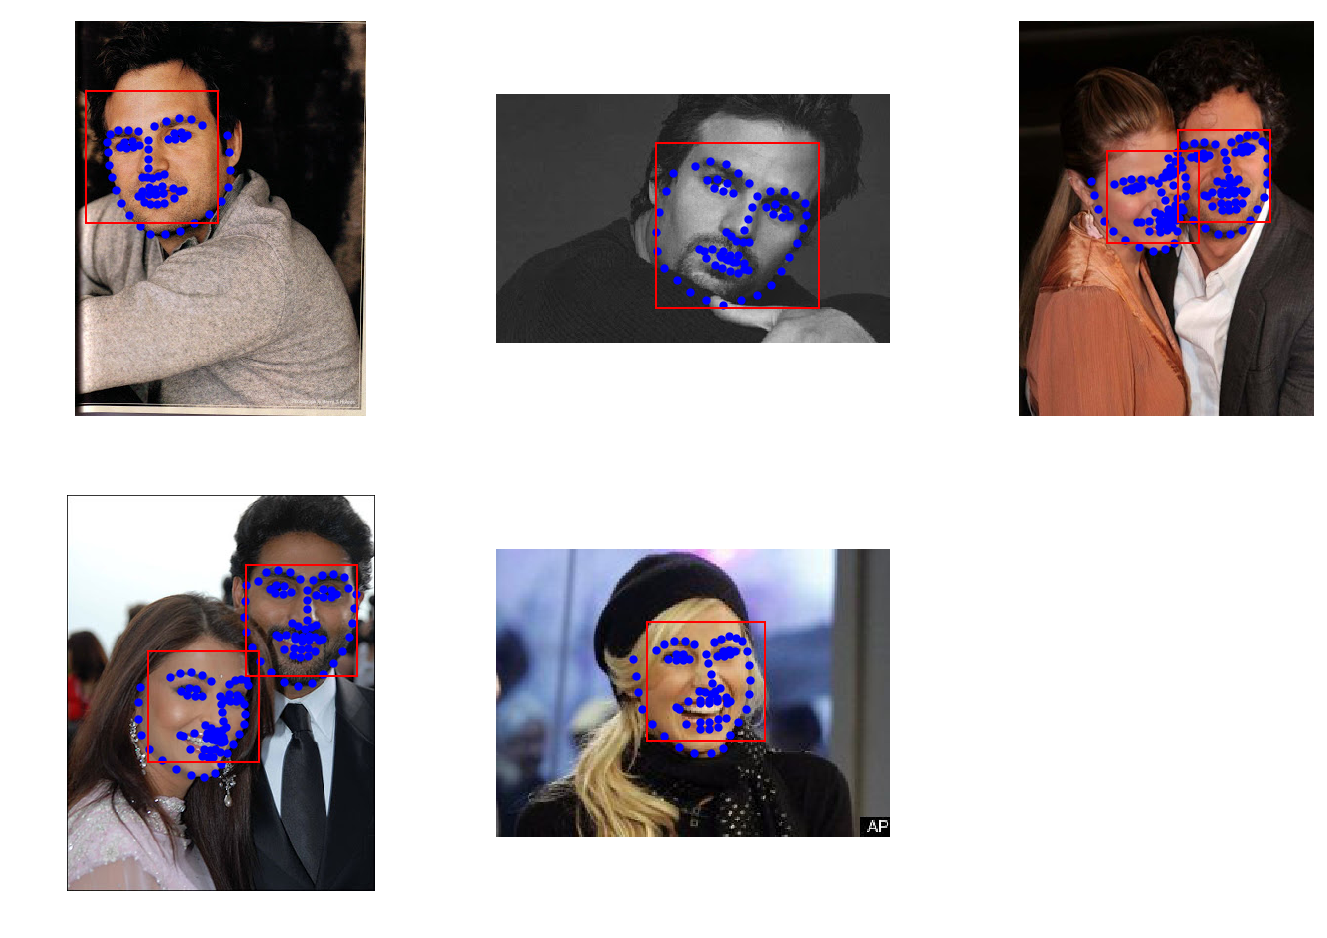

In [17]:
## 得到用来测试的每个人脸128个用于判断
clfeature = []
plt.figure(figsize=(12,8))
for ii,im in enumerate(image_test):
    ## 检测人脸
    dets = detector(im, 2)
    ## 将识别的图像可视化
    ax = plt.subplot(2,3,ii+1)
    ax.imshow(im)
    plt.axis("off")
    for i, face in enumerate(dets):
        # 在图片中标注人脸，并显示
        left = face.left()
        top = face.top()
        right = face.right()
        bottom = face.bottom()
        rect = mpatches.Rectangle((left,bottom), right - left, top - bottom,
                                      fill=False, edgecolor='red', linewidth=1)
        ax.add_patch(rect)
        ## 从检测到的人脸中识别特征点
        shape = predictor(im, face)
        detected_landmarks = shape.parts()  
        landmarks = np.array([[p.x, p.y] for p in detected_landmarks])
        ax.scatter(landmarks[:,0],landmarks[:,1],c="b",s = 10)
        ## 生成用于分类的128个特征
        cla = facerec.compute_face_descriptor(im,shape)
        clfeature.append(np.array(cla))
        print(ii)
plt.show()

计算特征之间的夹角余弦距离

两者之间的距离是: 0.037213224533761746
两者之间的距离是: 0.03675649056649899
两者之间的距离是: 0.0694461025831512
两者之间的距离是: 0.18976236436394367
两者之间的距离是: 0.23150645803322512
两者之间的距离是: 0.16615928741172226
两者之间的距离是: 0.20770325593066463


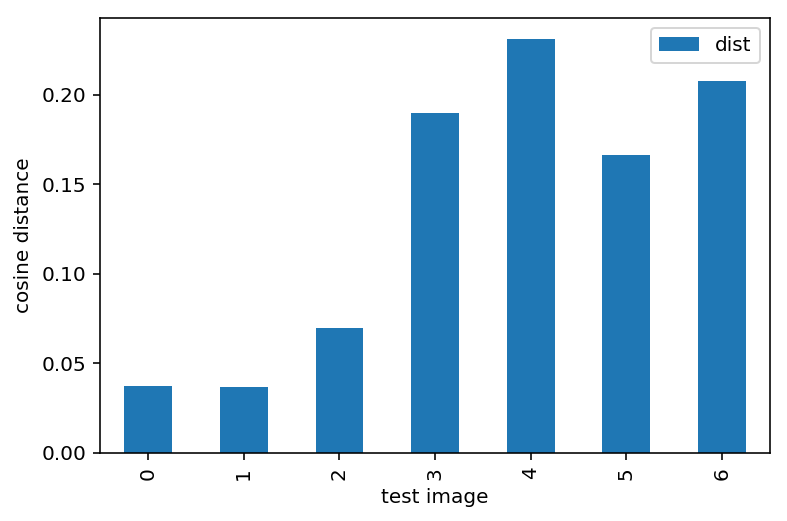

In [18]:
## 计算人脸特征之间的距离
dist = []
for f in clfeature:
    d = distance.cosine(IDfeature,f)
    print("两者之间的距离是:",d)
    dist.append(d)

## 将人脸特征之间的距离用直方图显示
pd.DataFrame({"dist":dist}).plot(kind = "bar")
plt.xlabel("test image")
plt.ylabel("cosine distance")
plt.show()

定义一个可调节阈值的函数，用来对身份的验证

In [0]:
## 定义一个判断摄像拍摄图片是否和身份证照片一致
def IDcardImrec(IDcardim,testim,threshold = 0.08):
    """
    IDcardim:从身份证上提取的照片
    testim:摄像头拍摄照片或者图片
    threshold:判断是否未同一张图像的阈值
    """
    import dlib
    import numpy as np
    from scipy.spatial import distance
    ## 识别人脸的方法
    detector = dlib.get_frontal_face_detector()
    ## 找到人脸特征点的方法
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
    ## 定义提前训练好的人脸分类器,用于提取人脸的128个特征
    facerec = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")
    ## ============================
    ## 找到IDcardim的人脸图像特征
    dets = detector(IDcardim, 2)
    ## 从检测到的人脸中识别特征点
    shape = predictor(IDcardim, dets[0])
    ## 生成用于分类的128个特征
    cla = facerec.compute_face_descriptor(IDcardim,shape)
    IDfeature = np.array(cla)
    ## ============================
    ## 找到testim的人脸图像特征
    dets = detector(testim, 2)
    # 处理测试图片中有不止一个人的情况
    for ii in dets:
      ## 从检测到的人脸中识别特征点
      shape = predictor(testim, ii)
      ## 生成用于分类的128个特征
      cla = facerec.compute_face_descriptor(testim,shape)
      test_feature = np.array(cla)
      ## ============================
      ## 计算两者之间的夹角余弦距离
      dist = distance.cosine(IDfeature,test_feature)
      if dist > threshold:
          print("验证失败",end=" ")
          ret = 0
      else:
          print("验证成功",end=" ")
          ret = 1
    print(" ")

In [30]:
## 对上方函数进行测试
for im in image_test:
    IDcardImrec(IDimage,im,threshold = 0.08)

验证成功  
验证成功  
验证成功 验证失败  
验证失败 验证失败  
验证失败  


这里主要利用python下的dlib来找到人脸的128个特征数据，然后比较相似性的方法。

detector是用来检测图像中的人脸位置的；predictor是用来找到人脸的68个特征点的；facerec是用来找到人脸具有判别能力的128个表示特征的。

测试图片过程中找到人脸，然后计算特征之间的夹角余弦值：
当距离<设定值时，判定成功；反之失败